In [12]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML

## Define classes

In [13]:
class Block():
    def __init__(self, size_x, size_y, is_final_block=False):
        self.id = None
        self.pos = dict()
        
        self.size_x = size_x
        self.size_y = size_y
        self.is_final_block = is_final_block
        
    def set_pos(self, x, y):
        self.pos["x"] = x
        self.pos["y"] = y
        
    @property
    def x(self):
        return self.pos["x"]

    @property
    def y(self):
        return self.pos["y"]
    
    def __repr__(self):
        return str("size_x: {} size_y: {} position: {} id: {} final: {}".format(
            self.size_x,
            self.size_y,
            self.pos,
            self.id,
            self.is_final_block
        ))

In [14]:
class Game():
    def __init__(self, size_x, size_y):
        self.grid = np.zeros(shape=(size_y, size_x), dtype=int)
        self.id_generator = self._id_generator()
        self.final_block = None
        self.blocks = dict()            
    
    def add_block(self, block, x, y):
        """add Bock to the game"""
        
        # check if space is occupied        
        if not self.is_placable(block, x, y):
            print("no block added")
            return
        
        # set final block
        if block.is_final_block:
            self.final_block = block
        
        # set block id
        block.id = next(self.id_generator)
        self.blocks[block.id] = block
        
        # set block position
        block.set_pos(x, y)
        
        # occupy space in grid
        self._set_block(block, x, y)
        
        print("block added: {}".format(block))
    
    def is_placable(self, block, x, y):
        """Check if Block is placable at position"""
        
        xmax = x + block.size_x
        ymax = y + block.size_y
        
        # check x bounds
        if x < 0 or xmax > self.grid.shape[1]:
            return False
        
        # check y bounds
        if y < 0 or ymax > self.grid.shape[0] :
            return False
        
        # check if occupied
        gridspace = self.grid[y : ymax, x : xmax]
        
        # mask out block id
        gridspace = gridspace[gridspace != block.id]
        
        if gridspace.sum() != 0:
            return False
        
        return True
    
    def move(self, block, x, y):
        """move a Block"""
        
        if isinstance(block, int):
            block = self.blocks[block]
        
        # no crazy moves
        assert abs(x) + abs(y) == 1
        
        x_new = block.x + x
        y_new = block.y + y
        
        if self.is_placable(block, x_new, y_new):
            
            # move block
            self._clear_block(block)
            self._set_block(block, x_new, y_new)
            block.set_pos(x_new, y_new)
            
            return True
        
        return False
    
    def set_finish_region(self, x, y, size_x, size_y):
        """Set region which has to be filled by self.final_block for the game to be over"""
        
        self.finish = dict(
            x=x,
            y=y,
            size_x=size_x,
            size_y=size_y
        )
    
    def won(self):
        """Is the finish filled by self.final_block?"""
        region = self.grid[self.finish["y"] : self.finish["y"] + self.finish["size_y"],
                           self.finish["x"] : self.finish["x"] + self.finish["size_x"]]
        return(np.all(region == self.final_block.id))
    
    @property
    def state(self):
        """return state of the grid so that different blocks with the same size and position are the same"""

        sorted_blocks = sorted(self.blocks.items(), key=lambda x: (x[1].size_x, x[1].size_y, x[1].x, x[1].y))
        
        return ";".join(
            ["sx{}_sy{}_px{}_py{}".format(
                x[1].size_x, 
                x[1].size_y, 
                x[1].x, 
                x[1].y) 
             for x in sorted_blocks]
        )
        
    
    def _id_generator(self):
        """ generate Block IDs """
        id_ = 0
        
        while True:
            id_ += 1
            yield id_
    
    @property
    def cmap(selp, cmap=cm.tab20b):
        return mpl.colors.ListedColormap([(1, 1, 1)] + [cmap(x/len(game.blocks)) for x in range(len(game.blocks))])
    
    def _clear_block(self, block):
        self.grid[self.grid==block.id] = 0
    
    def _set_block(self, block, x, y):
        self.grid[y : y + block.size_y, x : x + block.size_x] = block.id
    
    def __repr__(self):
        return str(self.grid)
    

## Set up the game

block added: size_x: 2 size_y: 2 position: {'x': 1, 'y': 0} id: 1 final: True
block added: size_x: 1 size_y: 2 position: {'x': 0, 'y': 0} id: 2 final: False
block added: size_x: 1 size_y: 2 position: {'x': 3, 'y': 0} id: 3 final: False
block added: size_x: 1 size_y: 2 position: {'x': 0, 'y': 2} id: 4 final: False
block added: size_x: 1 size_y: 2 position: {'x': 3, 'y': 2} id: 5 final: False
block added: size_x: 2 size_y: 1 position: {'x': 1, 'y': 2} id: 6 final: False
block added: size_x: 1 size_y: 1 position: {'x': 1, 'y': 3} id: 7 final: False
block added: size_x: 1 size_y: 1 position: {'x': 2, 'y': 3} id: 8 final: False
block added: size_x: 1 size_y: 1 position: {'x': 0, 'y': 4} id: 9 final: False
block added: size_x: 1 size_y: 1 position: {'x': 3, 'y': 4} id: 10 final: False


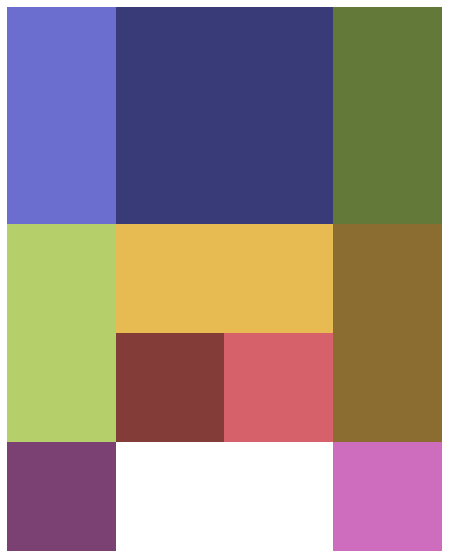

In [15]:
game = Game(4, 5)
game.set_finish_region(1, 4, 2, 1)

game.add_block(Block(2, 2, is_final_block=True), 1, 0)
game.add_block(Block(1, 2), 0, 0)
game.add_block(Block(1, 2), 3, 0)
game.add_block(Block(1, 2), 0, 2)
game.add_block(Block(1, 2), 3, 2)
game.add_block(Block(2, 1), 1, 2)
game.add_block(Block(1, 1), 1, 3)
game.add_block(Block(1, 1), 2, 3)
game.add_block(Block(1, 1), 0, 4)
game.add_block(Block(1, 1), 3, 4)

fig = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(game.grid, cmap=game.cmap);

## Set up solver

In [16]:

def copy_grids(grids):
    l = list()
    
    for g in grids:
        l.append(g.copy())
    return l

def solve(states = [], grids = [],  depth=0):
    global game
    
    # register the initial state
    if len(states) == 0:
        grids.append(game.grid.copy())
        states.append(game.state)
        
    for block in game.blocks:
        
        # 4 Possible movements of a block
        for x, y in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            
            # try to make a move
            if game.move(block, x, y):
                
                # move was legal
                
                # is the game over?
                if game.won():
                    print("GAME WAS SOLVED WITH {} STEPS".format(len(grids)))
                    states.append(game.state)
                    grids.append(game.grid.copy())
                    return grids, states, True
                
                # did the game move to a new state?
                if not game.state in states:
                    
                    # yes? nice! make new moves from here and remember the current state
                    states.append(game.state)
                    grids.append(game.grid.copy())
                    
                    # remember old states, but only keep grids from the path that leads to the solution
                    result = solve(states, copy_grids(grids), depth+1)
                    
                    # won? return result
                    if result:
                        return result
                    
                    # not won? move back
                    else:
                        game.move(block, -x, -y)
            
                # moved to a state the game has seen already? move back
                else:
                    game.move(block, -x, -y)
            
            # else
            # move was not legal -> continue
    
    # deadend
    return

## Solve the game

In [17]:
grids, states, solved = solve()

GAME WAS SOLVED WITH 2451 STEPS


## Create video with steps to solution

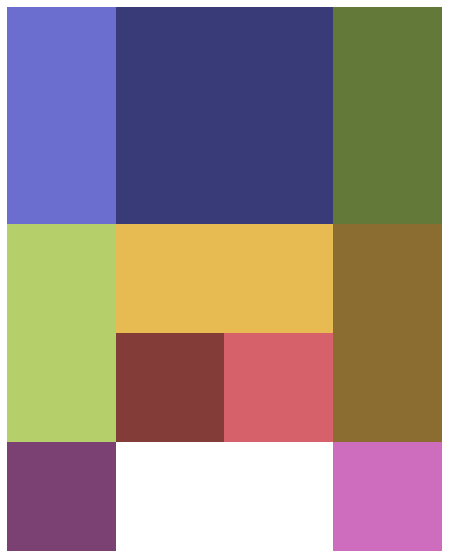

In [10]:
fig = plt.figure(figsize=(10, 10))
plt.axis('off')


im = plt.imshow(grids[0], cmap=game.cmap)

def animate(i):
    return im.set_array(grids[i])

In [11]:
anim = animation.FuncAnimation(
                               fig, 
                               animate, 
                               frames = len(grids),
                               interval = 300, # in ms
                               )

HTML(anim.to_html5_video())

In [23]:
!ipython nbconvert Klotski.ipynb --to html

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook Klotski.ipynb to html
[NbConvertApp] Writing 1418495 bytes to Klotski.html
